In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("../input/cs-training.csv",index_col = 0)
train.shape
#train.rename(columns={'Unnamed: 0': 'id'})

(150000, 11)

In [3]:
print(train.head())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                        0   
2                                4                        0   

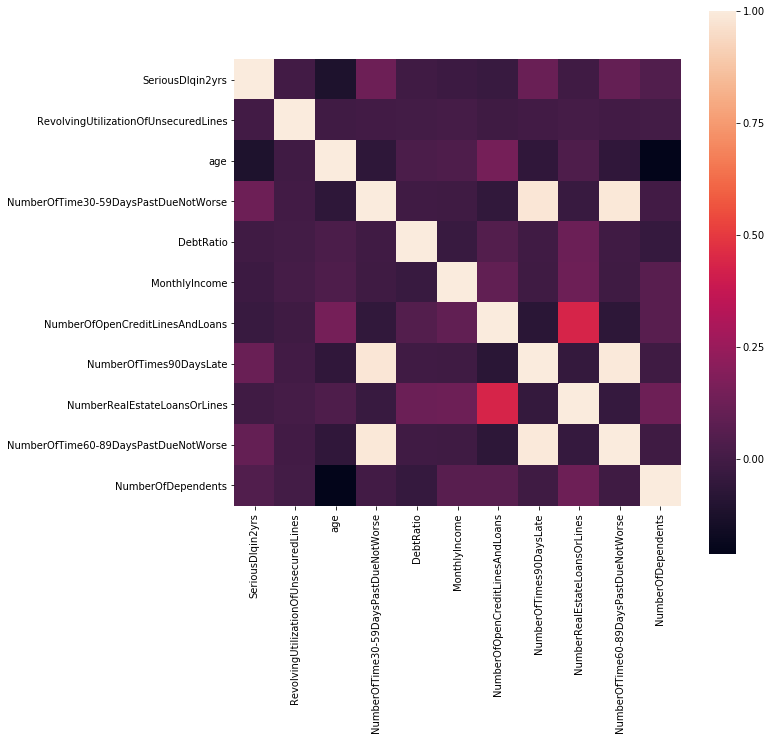

In [4]:
correlation_matrix = train.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, square = True)
plt.show()

According to this the average probability of severe financial distress is 6.7%

In [63]:
train = train.dropna(how='any')
train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [124]:
Y = train['SeriousDlqin2yrs']
train.pop('SeriousDlqin2yrs')
print(train.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [125]:
print(Y.shape,train.shape)

(120269,) (120269, 10)


Some data wrangling needs to be done so that the number of samples are equal

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train,Y,test_size=.1)


In [132]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
foo = classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

C:\Users\Reube\Miniconda3\envs\Data\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [130]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,Y_test))

0.9326515340483911


In [166]:
test = pd.read_csv("cs-test.csv",index_col = 0)
print(test.head())
print(test.isnull().sum())

   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1               NaN                              0.885519   43   
2               NaN                              0.463295   57   
3               NaN                              0.043275   59   
4               NaN                              0.280308   38   
5               NaN                              1.000000   27   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     0   0.177513         5700.0   
2                                     0   0.527237         9141.0   
3                                     0   0.687648         5083.0   
4                                     1   0.925961         3200.0   
5                                     0   0.019917         3865.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                                4                        0   
2                               15                        0   

In [168]:
Y = test['SeriousDlqin2yrs']
test.pop('SeriousDlqin2yrs')

In [199]:
test.fillna(0,inplace=True)
test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [222]:
Y = classifier.predict(test)
print(str(Y[0])+","+str(0))

0,0


In [234]:
import csv
import os

csvFile = "submission.csv"
if (os.path.isfile(csvFile)):
    os.remove(csvFile)
filename = csvFile

f = open(filename,"w+")
headers = "id,Probability\n"
f.write(headers)

for x in range(Y.shape[0]):
    f.write(str(x+1)+","+str(Y[x])+"\n")
f.close()

In [235]:
print(pd.read_csv("submission.csv").head())

   id  Probability
0   1            0
1   2            0
2   3            0
3   4            0
4   5            0
